<a href="https://colab.research.google.com/github/syaaa11/Uji-coba-dataset-CIFAR-10/blob/main/Klarifikasi_gambar_CIFAR_10_dengan_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Files already downloaded and verified


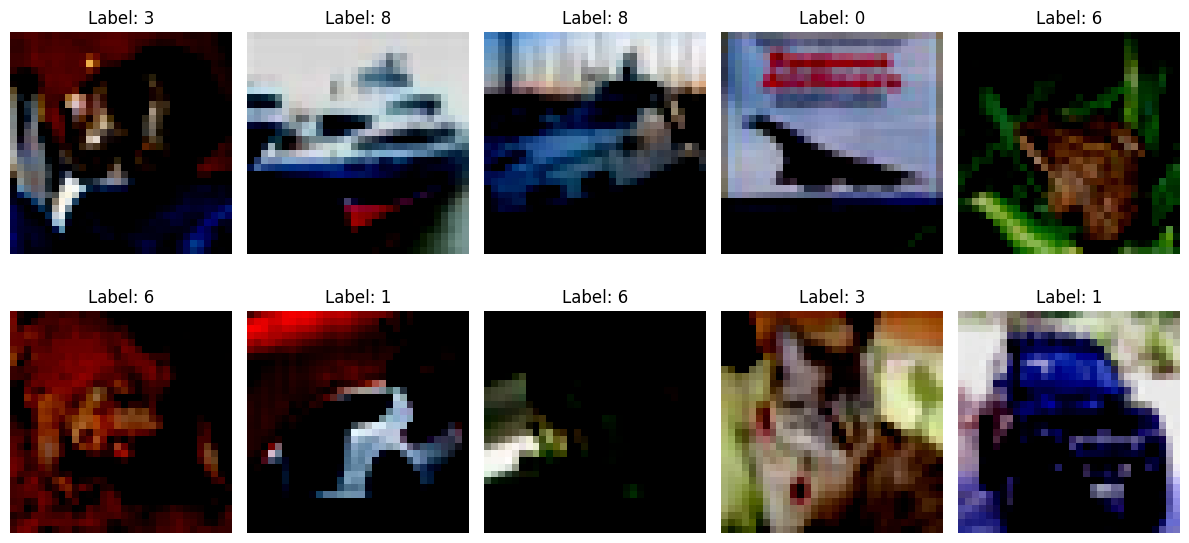

Files already downloaded and verified
Files already downloaded and verified
Epoch [1/10], Step [100/391], Loss: 1.4104422330856323
Epoch [1/10], Step [200/391], Loss: 1.3187686204910278
Epoch [1/10], Step [300/391], Loss: 1.246664047241211
Epoch [2/10], Step [100/391], Loss: 0.9262747168540955
Epoch [2/10], Step [200/391], Loss: 0.901343584060669
Epoch [2/10], Step [300/391], Loss: 1.073468565940857
Epoch [3/10], Step [100/391], Loss: 0.8946608304977417
Epoch [3/10], Step [200/391], Loss: 0.8340604901313782
Epoch [3/10], Step [300/391], Loss: 0.7727015018463135
Epoch [4/10], Step [100/391], Loss: 0.823541522026062
Epoch [4/10], Step [200/391], Loss: 0.8079452514648438
Epoch [4/10], Step [300/391], Loss: 0.7534863948822021
Epoch [5/10], Step [100/391], Loss: 0.7130668759346008
Epoch [5/10], Step [200/391], Loss: 0.6963731050491333
Epoch [5/10], Step [300/391], Loss: 0.5447487235069275
Epoch [6/10], Step [100/391], Loss: 0.5920028686523438
Epoch [6/10], Step [200/391], Loss: 0.7154933810

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=128, shuffle=False)
# Mengambil beberapa gambar dari dataset pengujian
sample_images, sample_labels = next(iter(test_loader))

# Menampilkan gambar-gambar tersebut
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()
for i in range(10):
    axes[i].imshow(sample_images[i].permute(1, 2, 0))
    axes[i].set_title(f"Label: {sample_labels[i].item()}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

# Definisikan arsitektur model CNN
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        out = self.conv1(x)
        out = self.relu(out)
        out = self.maxpool(out)
        out = self.conv2(out)
        out = self.relu(out)
        out = self.maxpool(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Persiapan data
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=128, shuffle=False)

# Inisialisasi model, loss function, dan optimizer
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Proses pelatihan
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item()}')

# Evaluasi model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy on test images: {accuracy}%')
